## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [4]:
cards = sample_cards(100, 6, 3)
cards

array([[ 10,  13,  62],
       [ 18,  32,  77],
       [  3,  93, 100],
       [ 20,  33,  80],
       [  4,  35,  96],
       [  1,  28,  42]])

and access the cards of each player with 

In [5]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([10, 13, 62]), array([18, 32, 77]))

The lowest card in the game is

In [6]:
np.min(cards)

1

In [7]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

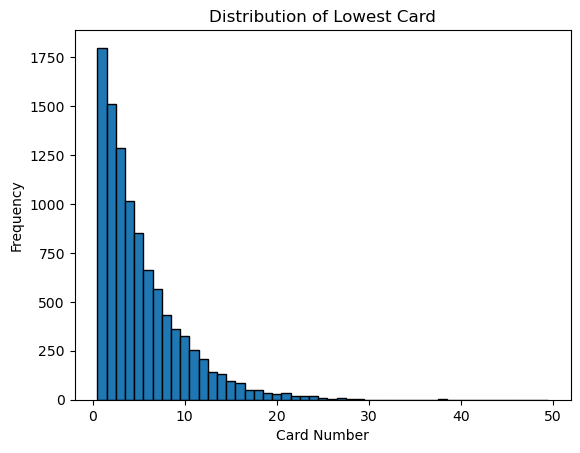

In [9]:
N=100
n=6
k=3

repeat = 10000

#creating a list that will hold the value of the lowest cards
cards = [None]*repeat
min_cards = [None]*repeat

for i in range(repeat):
    cards[i] = sample_cards(N, n, k)
    min_cards[i] = np.min(cards[i])

#plot of the distribution of the lowest card
plt.hist(min_cards, bins=np.arange(0.5, N/2+0.5, 1) , density=False, edgecolor='black')
plt.title('Distribution of Lowest Card')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

Mean of the Distribution of Largest Gap: 17.0067


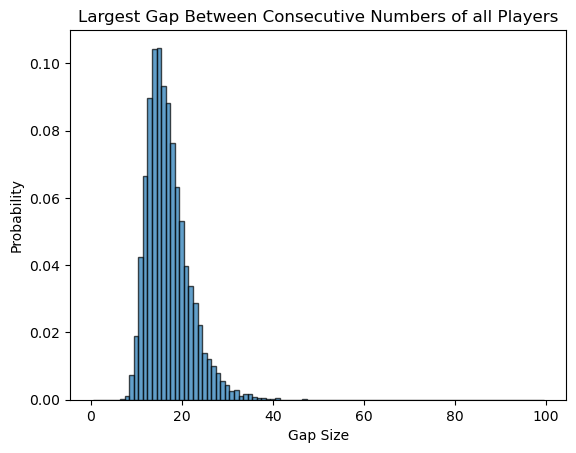

In [10]:
N=100
n=6
k=3

cards = sample_cards(N, n, k)

#finding the largest difference between all the conscutive numbers in the game
def largest_gap_between_all(cards):
    # Flatten the array and sort it
    flat_cards = cards.flatten()
    flat_cards.sort()
    # Calculate the differences between consecutive cards
    card_diffs = np.diff(flat_cards)
    # Find the largest gap
    largest_gap_all = np.max(card_diffs)
    return largest_gap_all

num_simulations = 10000
largest_gap_between_all_list = []

# Run simulations for several games to find the largest gap in each of the 10000 games
for _ in range(num_simulations):
    cards = sample_cards(N, n, k)
    largest_gap_all = largest_gap_between_all(cards)
    largest_gap_between_all_list.append(largest_gap_all)
    
print(f"Mean of the Distribution of Largest Gap: {np.mean(largest_gap_between_all_list)}") 
#this gives mean of all largest gaps between all players for 10000 simulations

# Plot histograms
plt.hist(largest_gap_between_all_list, bins=np.arange(0.5, N+0.5), alpha=0.7, density=True, edgecolor='k')
plt.title("Largest Gap Between Consecutive Numbers of all Players")
plt.xlabel("Gap Size")
plt.ylabel("Probability")
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

Mean of the Distribution of Largest Gap (Unique Players): 16.4043


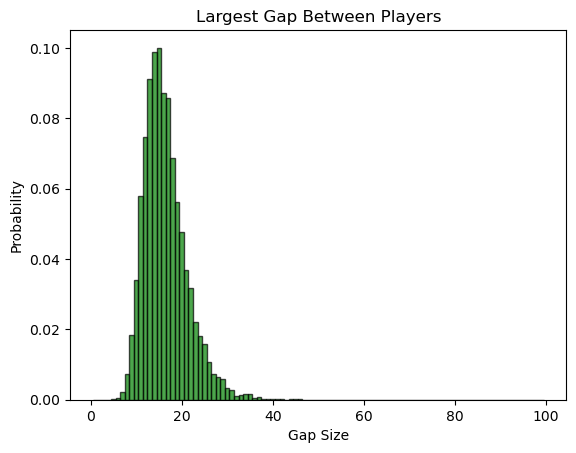

In [13]:
N=100
n=6
k=3

cards = sample_cards(N, n, k)

#finding the largest difference between the conscutive numbers which are in the hands of different players
#we do not include the largest gap if it is in the hand of the same player
def largest_gap_between_players(cards):
    player_ids = np.tile(np.arange(1,n+1), (k,1)).T
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    order_ids = np.argsort(flat_cards)
    flat_cards[order_ids]
    flat_ids[order_ids]
    gap_cards = np.diff(flat_cards[order_ids])
    gap_ids = np.diff(flat_ids[order_ids])
    gap_unique = gap_cards * (gap_ids != 0)
    largest_player_gap = np.max(gap_unique)
    return largest_player_gap

num_simulations = 10000 
largest_gap_between_players_list = []

# Run simulations for several games to find the largest gap in each of the 10000 games
for _ in range(num_simulations):
    cards = sample_cards(N, n, k)
    largest_gap_players = largest_gap_between_players(cards)
    largest_gap_between_players_list.append(largest_gap_players)

print(f"Mean of the Distribution of Largest Gap (Unique Players): {np.mean(largest_gap_between_players_list)}")
#this gives mean of all largest gaps between hands of different players for 10000 simulations

# Plot histograms
plt.hist(largest_gap_between_players_list, bins=np.arange(0.5, N+0.5), alpha=0.7, color='green', density=True, edgecolor='k')
plt.title("Largest Gap Between Players")
plt.xlabel("Gap Size")
plt.ylabel("Probability")
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

As n ie number of players in the game decreases, the differences in the means of the two distributions/simulations increases. The difference in the mean for the largest gap between all players and unique players is larger when n is smaller.

Overall the mean of the simulation where we take the largest gap in the hands of ALL players is larger than when we take the largest gap in the hands only from different players
This difference in the means of the 2 simulations is larger when n and k are smaller so if there are lesser number of players and lesser cards per player, the differences in the two means are more significant. 

The mean of all the largest gaps irrespective of the players is 17.0271
The mean of all the largest gaps between the hands of different players is 16.4484


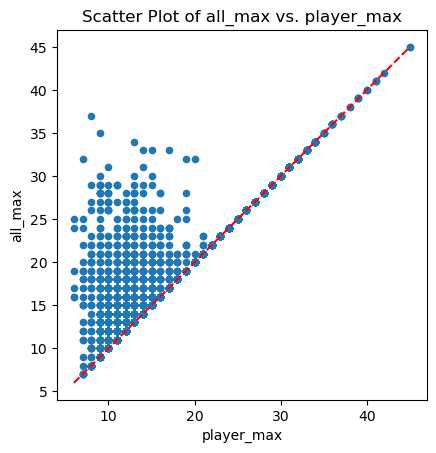

In [10]:
N=100
n=6
k=3
repeat = 10000

cards = sample_cards(N, n, k)

all_max = []
player_max = []

#finding the largest difference between all the conscutive numbers in the game
def largest_gap_between_all(cards):
    flat_cards = cards.flatten()
    flat_cards.sort()
    card_diffs = np.diff(flat_cards)
    largest_gap_all = np.max(card_diffs)
    return largest_gap_all

#finding the largest difference between the conscutive numbers which are in the hands of different players
def largest_gap_between_players(cards):
    player_ids = np.tile(np.arange(1,n+1), (k,1)).T
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    order_ids = np.argsort(flat_cards)
    flat_cards[order_ids]
    flat_ids[order_ids]
    gap_cards = np.diff(flat_cards[order_ids])
    gap_ids = np.diff(flat_ids[order_ids])
    gap_unique = gap_cards * (gap_ids != 0)
    largest_player_gap = np.max(gap_unique)
    return largest_player_gap

for _ in range(repeat):
    cards = sample_cards(N, n, k)
    all_max.append(largest_gap_between_all(cards))
    player_max.append(largest_gap_between_players(cards))
    
print("The mean of all the largest gaps irrespective of the players is " + str(np.mean(all_max)))
#this gives mean of all largest gaps between all players for 10000 simulations
#this is greater than the mean of all the simulations of the largest gaps between the hands of different players

print("The mean of all the largest gaps between the hands of different players is " + str(np.mean(player_max)))    
#this gives mean of all largest gaps between hands of different players for 10000 simulations

# Create a scatter plot
plt.scatter(player_max, all_max, s=20)
plt.xlabel('player_max')
plt.ylabel('all_max')
x = np.linspace(min(all_max + player_max), max(all_max + player_max), 100) 
plt.plot(x, x, color='red', linestyle='--', label='x=y Line')  # Add the diagonal line
plt.title('Scatter Plot of all_max vs. player_max for n=6')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#this plot shows that the largest gaps between consecutive numbers in the hands of all players is greater than
#when we look at the largest gaps between the consecutive numbers in the hands of different players
#this can be seen as the points are above the x=y line
#also the mean of the first case is higher when we run 10000 simulations than the second case
#where we are also considering the hand of which player has the largest gap

The mean of all the largest gaps irrespective of the players is 26.5383
The mean of all the largest gaps between the hands of different players is 23.8375


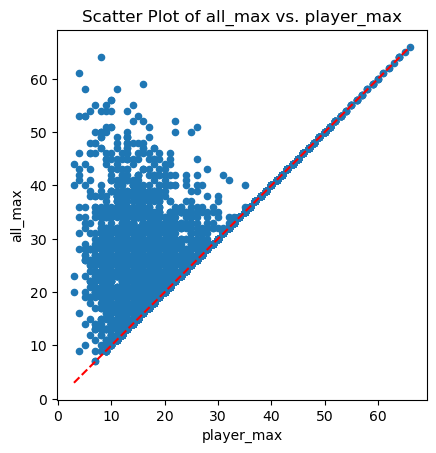

In [11]:
N=100
n=3 #the diff between the 2 simulations is larger when the number of players n is smaller
#lesser players will lead to larger differences in the means of the two simulations
k=3
repeat = 10000

cards = sample_cards(N, n, k)

all_max = []
player_max = []

def largest_gap_between_all(cards):
    flat_cards = cards.flatten()
    flat_cards.sort()
    card_diffs = np.diff(flat_cards)
    largest_gap_all = np.max(card_diffs)
    return largest_gap_all

def largest_gap_between_players(cards):
    player_ids = np.tile(np.arange(1,n+1), (k,1)).T
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    order_ids = np.argsort(flat_cards)
    flat_cards[order_ids]
    flat_ids[order_ids]
    gap_cards = np.diff(flat_cards[order_ids])
    gap_ids = np.diff(flat_ids[order_ids])
    gap_unique = gap_cards * (gap_ids != 0)
    largest_player_gap = np.max(gap_unique)
    return largest_player_gap

for _ in range(repeat):
    cards = sample_cards(N, n, k)
    all_max.append(largest_gap_between_all(cards))
    player_max.append(largest_gap_between_players(cards))
    
print("The mean of all the largest gaps irrespective of the players is " + str(np.mean(all_max)))
#this gives mean of all largest gaps between all players for 10000 simulations
#this is greater than the mean of all the simulations of the largest gaps between the hands of different players
       
print("The mean of all the largest gaps between the hands of different players is " + str(np.mean(player_max)))    
#this gives mean of all largest gaps between hands of different players for 10000 simulations

# Create a scatter plot
plt.scatter(player_max, all_max, s=20)
plt.xlabel('player_max')
plt.ylabel('all_max')
x = np.linspace(min(all_max + player_max), max(all_max + player_max), 100) 
plt.plot(x, x, color='red', linestyle='--', label='x=y Line')  # Add the diagonal line
plt.title('Scatter Plot of all_max vs. player_max for n=3')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#this plot shows that the largest gaps between consecutive numbers in the hands of all players is greater than
#when we look at the largest gaps between the consecutive numbers in the hands of different players
#this can be seen as the points are above the x=y line
#also the mean of the first case is higher considerably when we run 10000 simulations than the second case
#where we are also considering the hand of which player has the largest gap

The mean of all the largest gaps irrespective of the players is 11.3398
The mean of all the largest gaps between the hands of different players is 11.1523


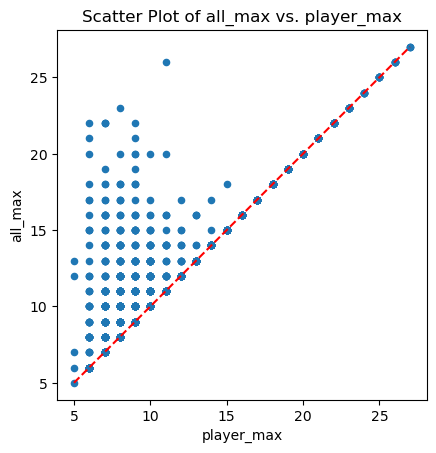

In [12]:
N=100
n=10 #the diff between the 2 simulations is smaller when the number of players (n) is larger
#more players will lead to smaller differences in the means of the two simulations
k=3
repeat = 10000

cards = sample_cards(N, n, k)

all_max = []
player_max = []

def largest_gap_between_all(cards):
    flat_cards = cards.flatten()
    flat_cards.sort()
    card_diffs = np.diff(flat_cards)
    largest_gap_all = np.max(card_diffs)
    return largest_gap_all

def largest_gap_between_players(cards):
    player_ids = np.tile(np.arange(1,n+1), (k,1)).T
    flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
    #Sort cards, but gets the indices instead
    order_ids = np.argsort(flat_cards)
    #we can recover the ordered cards by 
    flat_cards[order_ids]
    #order ids
    flat_ids[order_ids]
    gap_cards = np.diff(flat_cards[order_ids])
    gap_ids = np.diff(flat_ids[order_ids])
    gap_unique = gap_cards * (gap_ids != 0)
    largest_player_gap = np.max(gap_unique)
    return largest_player_gap

for _ in range(repeat):
    cards = sample_cards(N, n, k)
    all_max.append(largest_gap_between_all(cards))
    player_max.append(largest_gap_between_players(cards))
    
print("The mean of all the largest gaps irrespective of the players is " + str(np.mean(all_max)))
#this gives mean of all largest gaps between all players for 10000 simulations
#this is greater than the mean of all the simulations of the largest gaps between the hands of different players

print("The mean of all the largest gaps between the hands of different players is " + str(np.mean(player_max)))    
#this gives mean of all largest gaps between hands of different players for 10000 simulations

# Create a scatter plot
plt.scatter(player_max, all_max, s=20)
plt.xlabel('player_max')
plt.ylabel('all_max')
x = np.linspace(min(all_max + player_max), max(all_max + player_max), 100) 
plt.plot(x, x, color='red', linestyle='--', label='x=y Line')  # Add the diagonal line
plt.title('Scatter Plot of all_max vs. player_max for n=10')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#this plot shows that the largest gaps between consecutive numbers in the hands of all players is greater than
#when we look at the largest gaps between the consecutive numbers in the hands of different players
#this can be seen as the points are above the x=y line
#also the mean of the first case is still slightly higher when we run 10000 simulations than the second case
#where we are also considering the hand of which player has the largest gap

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_cards()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

Simulated p: 0.18020999999999998
Theoretical p: 0.17999999999999983


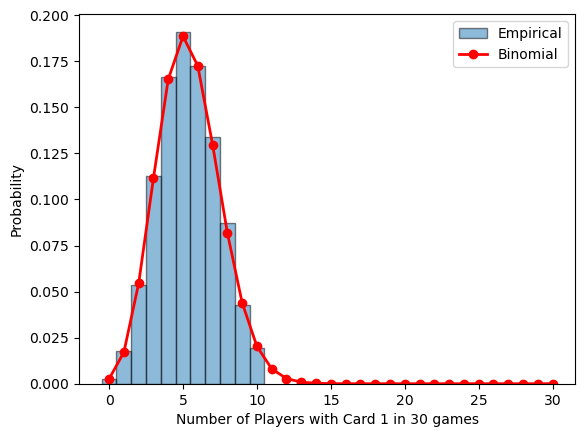

In [12]:
# Define parameters
N = 100  # Total number of cards
n = 6    # Number of players
k = 3    # Number of cards per player
x = 1    # Specific card number I am interested in
trials = 30  
num_simulations = 10000

# success is getting a 1 in the game which is the lowest card

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def has_card_x(player_cards, x):
    # returns true if card x=1 exists in the game
    return x in player_cards

def simulate_games(N, n, k, x, trials):
    # simulating 30 bernoulli random variables based on if the card '1' is in the game or not
    successes = [] 
    for i in range(trials):
        game_cards = sample_cards(N, n, k)
        success_count = np.sum([has_card_x(player_cards, x) for player_cards in game_cards])
        successes.append(success_count)
    return successes

def simulate_bin(N, n, k, x, trials, num_simulations):
    # simulating 10000 binomial random variables
    total_successes = [] 
    for _ in range(num_simulations):
        # Call the simulate_games function and store the results
        simulation_results = simulate_games(N, n, k, x, trials)
        total_successes.append(sum(simulation_results))  # Append the sum of successes for one simulation
    
    return total_successes

# Simulate games 10000 times and store the results in total_successes
total_successes = simulate_bin(N, n, k, x, trials, num_simulations)

prob = [ts/trials for ts in total_successes] #we divide by trails=30 since there are 30 cards, ie we are summming 30 bernoulli rv 
#to get 1 binom rv so N for binomial dist is 30 
p = np.mean(prob)
print(f"Simulated p: {p}")
#this gives us our simulated probability for the binomial which is very close to the theoretical probability of getting a 1
#in a game where out of 100 cards, 18 are dealt (since there are 6*3 cards dealt).

# adjusting bin edges for the mass to be centred in the bins
xmin = 0
xmax = 10
num_bins = 11
bin_edges = np.linspace(xmin - 0.5, xmax + 0.5, num_bins + 1)

# Plot the empirical distribution
plt.hist(total_successes, bins=bin_edges, density=True, alpha=0.5, label='Empirical', edgecolor='k')

# Calculating theoretical p
theoretical_p = 1 - 99/100*98/99*97/98*96/97*95/96*94/95*93/94*92/93*91/92*90/91*89/90*88/89*87/88*86/87*85/86*84/85*83/84*82/83
print(f"Theoretical p: {theoretical_p}")

# Plot the binomial distribution
binom_dist = binom(trials, theoretical_p)
x_values = np.arange(trials+1)
plt.plot(x_values, binom_dist.pmf(x_values), 'ro-', label='Binomial', linewidth=2)
plt.xlabel('Number of Players with Card ' + str(x) + ' in ' + str(trials) + ' games')
plt.ylabel('Probability')
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

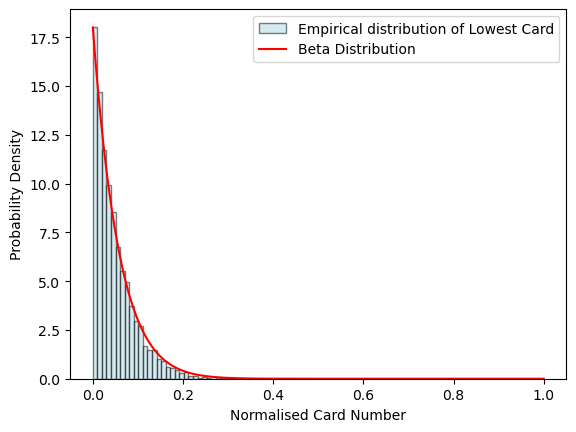

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define parameters
N = 100  # Total number of cards
n = 6    # Number of players
k = 3    # Number of cards per player
repeat = 10000  # Number of game simulations

# Simulate the lowest card values
cards = [None]*repeat
min_cards = [None]*repeat

for i in range(repeat):
    cards[i] = sample_cards(N, n, k)
    min_cards[i] = np.min(cards[i])
    
# Normalize the minimum card values to the range [0, 1]
min_cards_normalized = np.array(min_cards) / N

# Generate values from Beta(1, k)
# creates an array x of 1000 evenly spaced values between 0 and 1 
x = np.linspace(0, 1, 1000)
# alpha = 1 (looking for 1st order statistic) and Beta = n*k
betaPDF = beta.pdf(x, 1, (n*k)+1-1)

# Plot histograms of smallest card distribution and Beta(1,k) distribution
plt.hist(min_cards_normalized, bins=np.linspace(0,1,100), density=True,alpha=0.5, edgecolor="k", color = "lightblue", label="Empirical distribution of Lowest Card")
plt.plot(x, betaPDF, 'r-', label=f'Beta Distribution')
plt.legend()
plt.xlabel('Normalised Card Number')
plt.ylabel('Probability Density')
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

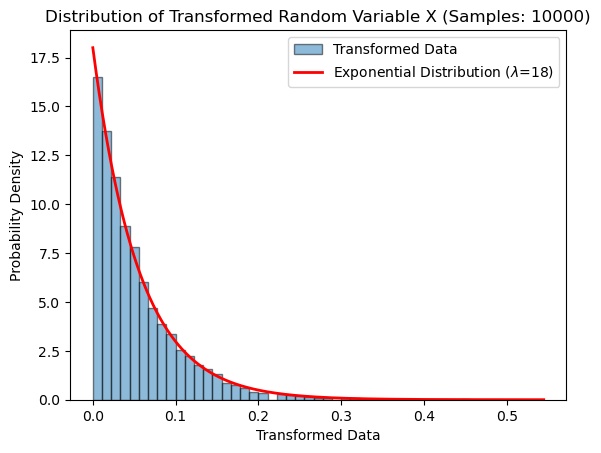

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Define parameters
N = 100  # Total number of cards
n = 6    # Number of players
k = 3    # Number of cards per player
repeat = 10000  # Number of game simulations

# Simulate the lowest card and transform the values
transform_lowest_cards = [None]*repeat
cards = [None]*repeat
min_card = [None]*repeat

for i in range(repeat):
    cards[i] = sample_cards(N, n, k)
    min_card[i] = np.min(cards[i])
    transform_lowest_cards[i] = -np.log(1 - min_card[i]/N)

# Plot the histogram of the transformed random variable with a label
plt.hist(transform_lowest_cards, bins=np.linspace(0, np.max(transform_lowest_cards), 50), alpha = 0.5, density=True, edgecolor='black', label='Transformed Data')

# Fit an exponential distribution to the transformed data
param = (n * k)
x_values = np.linspace(0, np.max(transform_lowest_cards), 1000)
exponential_dist = expon.pdf(x_values, scale=1/param)

# Plot the fitted exponential distribution
plt.plot(x_values, exponential_dist, 'r-', label=f'Exponential Distribution ($\lambda$={n*k})', linewidth=2)
plt.title(f'Distribution of Transformed Random Variable X (Samples: {repeat})')
plt.xlabel('Transformed Data')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without replacement compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

I am interested in analysing the distribution of the lowest card with large and small N based on if we sample with and without replacement. 
We will look at 4 cases: 
1. Large N and without replacement
2. Large N and with replacement
3. Small N and without replacement
4. Small N and with replacement

As N increases so as n*k << N then replacement or not will have a lesser effect on the distribution and the two strategies will lead to similar results.

For with and without replacement for large N, the difference in the distribution of the lowest card, is nearly neglible since with such a large N it is unlikely to see the same card again if n*k << N

But for small N, if we sample without replacement, the probability of having 1 is the game is higher than if we sample with replacement and the distribution of the lowest card in the game looks very different based on if we sample with or without replacememt

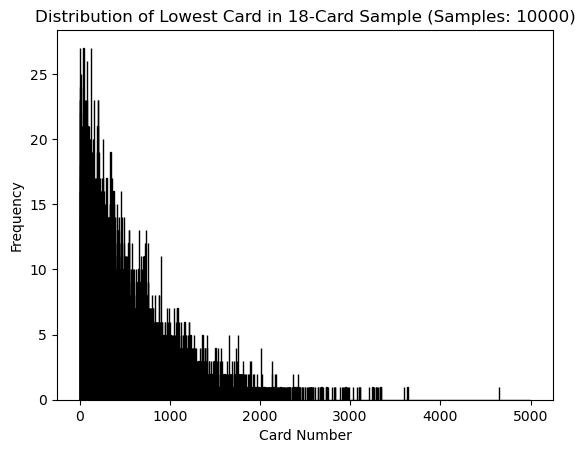

In [126]:
# Large N 
# Without replacement 
N=10000
n=6
k=3

repeat = 10000

#creating a list that will hold the value of the lowest cards
cards = [None]*repeat
min_cards = [None]*repeat

for i in range(repeat):
    cards[i] = sample_cards(N, n, k)
    min_cards[i] = np.min(cards[i])

#plot of the distribution of the lowest card
plt.hist(min_cards, bins=np.arange(0.5, N/2+0.5, 1) , density=False, edgecolor='black')
plt.title(f'Distribution of Lowest Card in {n*k}-Card Sample (Samples: {repeat})')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.show()

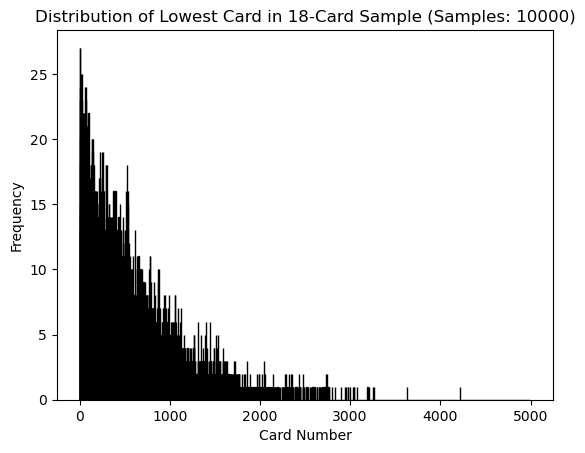

In [127]:
# creating a function to sample with replacement
def sample_game(N, n, k):
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

# Large N 
# With replacement 

N=10000
n=6
k=3

repeat = 10000

#creating a list that will hold the value of the lowest cards
cards = [None]*repeat
min_cards = [None]*repeat

for i in range(repeat):
    cards[i] = sample_game(N, n, k)
    min_cards[i] = np.min(cards[i])

#plot of the distribution of the lowest card
plt.hist(min_cards, bins=np.arange(0.5, N/2+0.5, 1) , density=False, edgecolor='black')
plt.title(f'Distribution of Lowest Card in {n*k}-Card Sample (Samples: {repeat})')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.show()

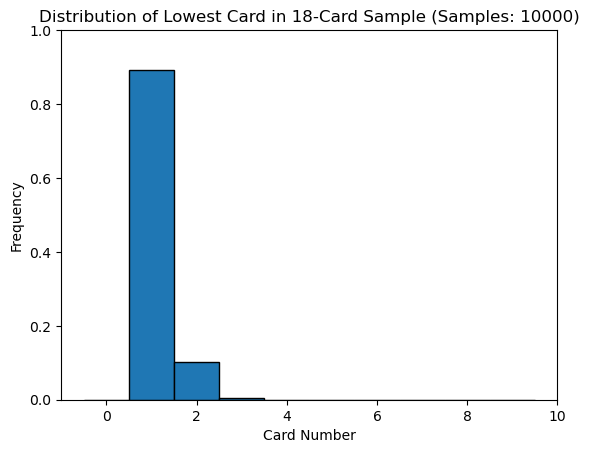

In [135]:
# Small N 
# Without replacement 
N=20
n=6
k=3

repeat = 10000

#creating a list that will hold the value of the lowest cards
cards = [None]*repeat
min_cards = [None]*repeat

for i in range(repeat):
    cards[i] = sample_cards(N, n, k)
    min_cards[i] = np.min(cards[i])

#plot of the distribution of the lowest card
plt.hist(min_cards, bins=np.arange(-0.5, N/2+0.5, 1) , density=True, edgecolor='black')
plt.title(f'Distribution of Lowest Card in {n*k}-Card Sample (Samples: {repeat})')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.ylim(0,1)
plt.show()

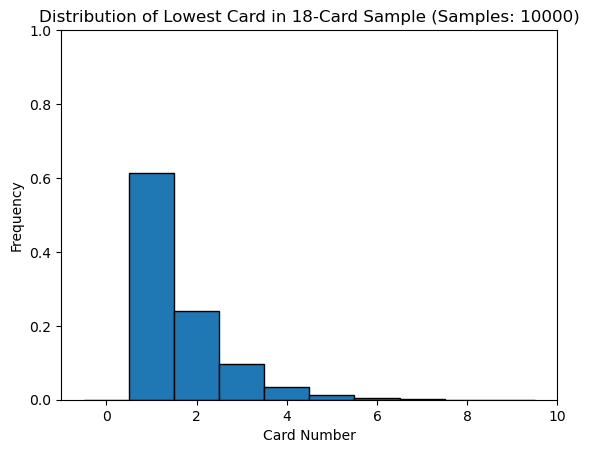

In [134]:
# creating a function to sample with replacement
def sample_game(N, n, k):
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

# Small N 
# With replacement 

N=20
n=6
k=3

repeat = 10000

#creating a list that will hold the value of the lowest cards
cards = [None]*repeat
min_cards = [None]*repeat

for i in range(repeat):
    cards[i] = sample_game(N, n, k)
    min_cards[i] = np.min(cards[i])

#plot of the distribution of the lowest card
plt.hist(min_cards, bins=np.arange(-0.5, N/2+0.5, 1) , density=True, edgecolor='black')
plt.title(f'Distribution of Lowest Card in {n*k}-Card Sample (Samples: {repeat})')
plt.xlabel('Card Number')
plt.ylabel('Frequency')
plt.ylim(0,1)
plt.show()

## Explanation


Sampling without Replacement: Irrespective of if n*k << N or not, if the cards are drawn without replacement, 
once a card is selected for a player, it cannot be selected again. So the probability of seeing the same card in the same game
is 0. So the cards in any one game are always unique.

Sampling with Replacement: If the cards are drawn without replacement, then is matters if n*k << N 
or if n*k is close to N. In general, cards are selected for players with replacement, 
meaning the same card can be drawn for multiple players. However, if n*k << N, then it is quite unlikely that the same card 
will be drawn for different players because there are still many different cards available so once a card is selected for a player, it goes back into the deck and can be selected again but the probability of that is very very low since the total
number of cards available are a lot compared to the number of cards we are selecting for this game. 
So the probability of seeing the same card in the same game is very low. So the cards in any one game are mostly unique too.

As seen above,
If n*k is not << N, then the difference in sampling with and without replacement is a lot. As above, if we sample without replacement, and deal 18 out of N = 20 cards, then probability of 1 being out there in game is very high versus if we sample with replacement then we may see a 1 but every card is equally likely since we put the cards back in the deck so the distribution is different.

But if n*k << N, the difference between sampling with and without replacement becomes minimal, and the results 
from both sampling strategies will be very similar. This is because the probability of drawing the same card
for different players is low in both cases due to the abundance of available cards compared to the cards distributed.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Aarushi Somani (aarushi-somani-19)
- Member No2: Lauren Murai (lmurai)
- Member No3: